In [1]:
import nltk

In [2]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [3]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

(u'NN', [(u'year', 137), (u'time', 97), (u'state', 88), (u'week', 85), (u'man', 72)])
(u'NN$', [(u"year's", 13), (u"world's", 8), (u"state's", 7), (u"nation's", 6), (u"company's", 6)])
(u'NN$-HL', [(u"Golf's", 1), (u"Navy's", 1)])
(u'NN$-TL', [(u"President's", 11), (u"University's", 3), (u"League's", 3), (u"Gallery's", 3), (u"Army's", 3)])
(u'NN-HL', [(u'cut', 2), (u'Salary', 2), (u'condition', 2), (u'Question', 2), (u'business', 2)])
(u'NN-NC', [(u'eva', 1), (u'ova', 1), (u'aya', 1)])
(u'NN-TL', [(u'President', 88), (u'House', 68), (u'State', 59), (u'University', 42), (u'City', 41)])
(u'NN-TL-HL', [(u'Fort', 2), (u'City', 1), (u'Commissioner', 1), (u'Grove', 1), (u'House', 1)])
(u'NNS', [(u'years', 101), (u'members', 69), (u'people', 52), (u'sales', 51), (u'men', 46)])
(u'NNS$', [(u"children's", 7), (u"women's", 5), (u"men's", 3), (u"janitors'", 3), (u"taxpayers'", 2)])
(u'NNS$-HL', [(u"Dealers'", 1), (u"Idols'", 1)])
(u'NNS$-TL', [(u"Women's", 4), (u"States'", 3), (u"Giants'", 2), (u

In [4]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')

In [6]:
from collections import defaultdict
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v

alice2 = [mapping[v] for v in alice]
alice2[:100]

['UNK',
 u'Alice',
 u"'",
 u's',
 u'Adventures',
 u'in',
 u'Wonderland',
 u'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 u'CHAPTER',
 u'I',
 u'.',
 'UNK',
 u'the',
 u'Rabbit',
 u'-',
 'UNK',
 u'Alice',
 u'was',
 u'beginning',
 u'to',
 u'get',
 u'very',
 u'tired',
 u'of',
 u'sitting',
 u'by',
 u'her',
 u'sister',
 u'on',
 u'the',
 u'bank',
 u',',
 u'and',
 u'of',
 u'having',
 u'nothing',
 u'to',
 u'do',
 u':',
 u'once',
 u'or',
 u'twice',
 u'she',
 u'had',
 'UNK',
 u'into',
 u'the',
 u'book',
 u'her',
 u'sister',
 u'was',
 'UNK',
 u',',
 u'but',
 u'it',
 u'had',
 u'no',
 u'pictures',
 u'or',
 'UNK',
 u'in',
 u'it',
 u',',
 u"'",
 u'and',
 u'what',
 u'is',
 u'the',
 u'use',
 u'of',
 u'a',
 u'book',
 u",'",
 u'thought',
 u'Alice',
 u"'",
 u'without',
 u'pictures',
 u'or',
 u'conversation',
 u"?'",
 u'So',
 u'she',
 u'was',
 'UNK',
 u'in',
 u'her',
 u'own',
 u'mind',
 u'(',
 u'as',
 u'well',
 u'as',
 u'she',
 u'could',
 u',']

In [7]:
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1

In [8]:
counts 

defaultdict(int,
            {u'.': 11928,
             u'ADJ': 6706,
             u'ADP': 12355,
             u'ADV': 3349,
             u'CONJ': 2717,
             u'DET': 11389,
             u'NOUN': 30654,
             u'NUM': 2166,
             u'PRON': 2535,
             u'PRT': 2264,
             u'VERB': 14399,
             u'X': 92})

In [10]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)

[(u'NOUN', 30654),
 (u'VERB', 14399),
 (u'ADP', 12355),
 (u'.', 11928),
 (u'DET', 11389),
 (u'ADJ', 6706),
 (u'ADV', 3349),
 (u'CONJ', 2717),
 (u'PRON', 2535),
 (u'PRT', 2264),
 (u'NUM', 2166),
 (u'X', 92)]

### Tagging

In [11]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [12]:
sent = brown.sents(categories='news')[3]

In [13]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

In [15]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

In [16]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

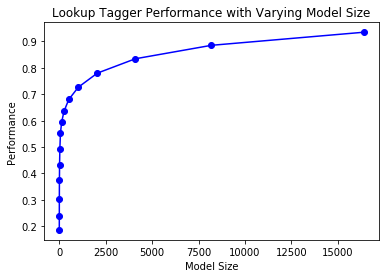

In [18]:
%matplotlib inline
display()  

### N-Gram Tagging

In [19]:
size = int(len(brown_tagged_sents) * 0.9)
print(size)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

4160


0.8120203329014253

In [20]:
bigram_tagger = nltk.BigramTagger(train_sents)

In [21]:
bigram_tagger.tag(brown_sents[2007])

[(u'Various', u'JJ'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'apartments', u'NNS'),
 (u'are', u'BER'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'terrace', u'NN'),
 (u'type', u'NN'),
 (u',', u','),
 (u'being', u'BEG'),
 (u'on', u'IN'),
 (u'the', u'AT'),
 (u'ground', u'NN'),
 (u'floor', u'NN'),
 (u'so', u'CS'),
 (u'that', u'CS'),
 (u'entrance', u'NN'),
 (u'is', u'BEZ'),
 (u'direct', u'JJ'),
 (u'.', u'.')]

In [22]:
bigram_tagger.evaluate(test_sents)

0.10276088906608193

In [23]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.844911791089405